# _CREDIT CARD FRAUD DETECTION USING MACHINE LEARNING CLASSIFICATION ALGORITHMS_

### AUTHOR: EESHAN SHETTY

In this project, we will be using Creditcard data and use various classification models to predict the outcome which is to detect fraud. We will be using the _creditcard.csv_ data set . We will be conducting the following tasks in this project
 
 * Importing and Preprocessing the Data set 
 
 * Preparing the data for machine learning model creation
 
 * Calculating Machine learning model metrics and deciding the best model for prediction aamongst the three selected for this project


In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from scipy.stats import zscore

## Importing and Preprocessing the data

In [112]:
df=pd.read_csv('creditcard.csv')

In [113]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [114]:
df.info()# Dtype,shape and other attributes of the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [115]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [116]:
df.duplicated().sum() #Duplicate rows which will be dropped 

1081

In [117]:
print('Shape of dataset before dropping duplicates is ',df.shape)# Do not run this kernel after dropping the values, it will alter the output

Shape of dataset before dropping duplicates is  (284807, 31)


In [118]:
df.drop_duplicates(inplace=True)

In [119]:
print('Shape of dataset after dropping duplicate is ',df.shape)

Shape of dataset after dropping duplicate is  (283726, 31)


In [120]:
df.describe().T # Statistical information of the data set provided

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


#### Univariate Analysis

In [121]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Concentration of the target variable-Class')

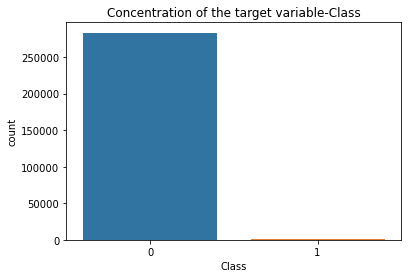

In [122]:
sns.countplot(df['Class'])
plt.title('Concentration of the target variable-Class')

<AxesSubplot:>

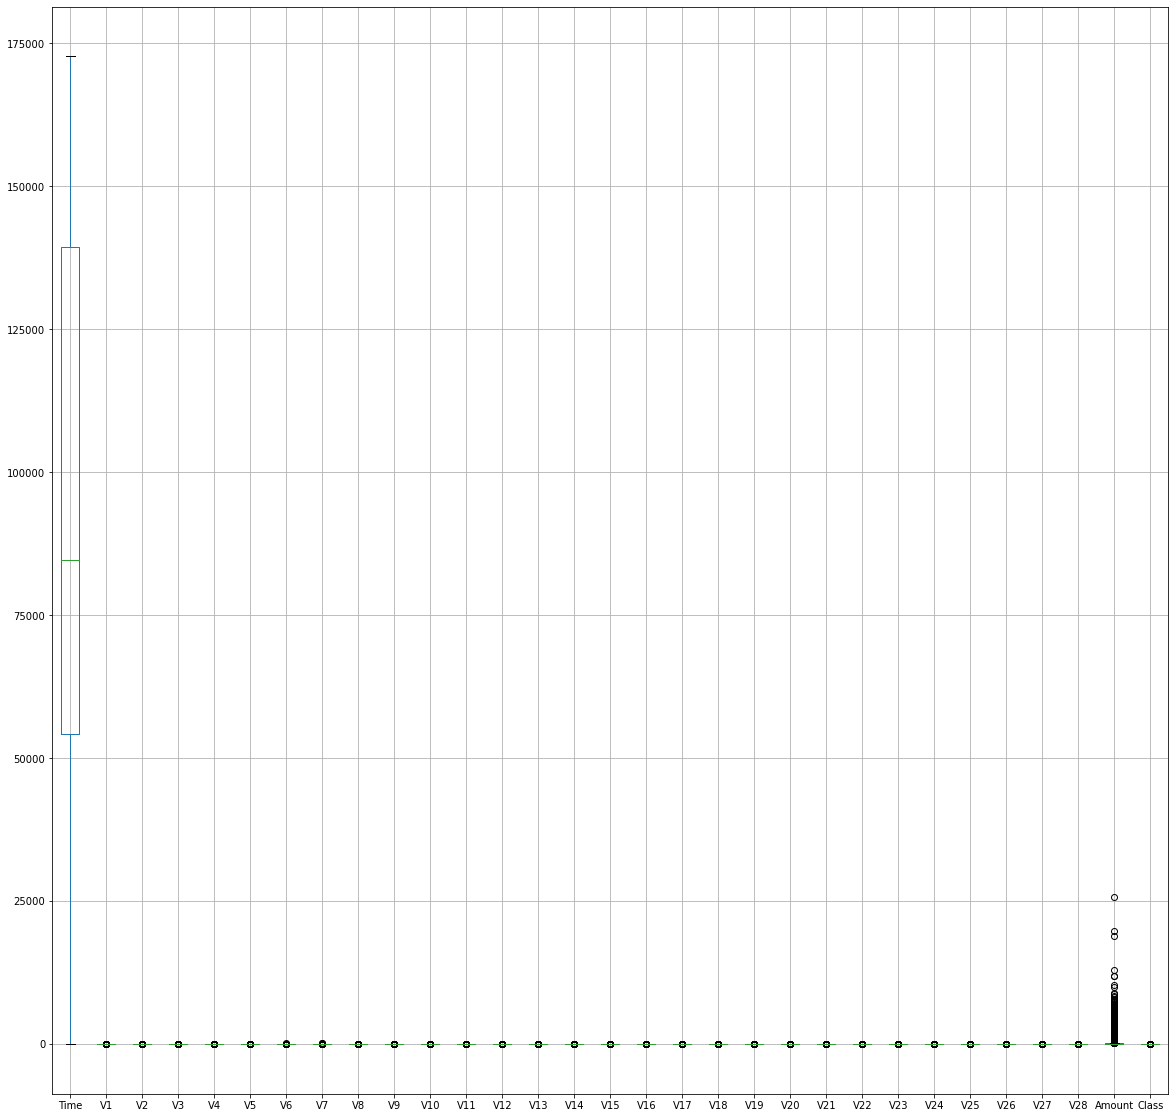

In [123]:
df.boxplot(figsize=(20,20))# From figure it is evident that major outliers are present in the amount variable and will be treated to improve model performance'

In [124]:
def Outlier_Treatment(x):
    upper=x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))
    lower=x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))
    return(print('The Upper and lower extremities are {} and {}'.format(upper,lower)))

In [125]:
Outlier_Treatment(df['Amount'])

The Upper and lower extremities are 185.375 and -102.26500000000001


In [126]:
df['Amount']=np.where(df['Amount']>185.375,185.375,df['Amount'])

<AxesSubplot:>

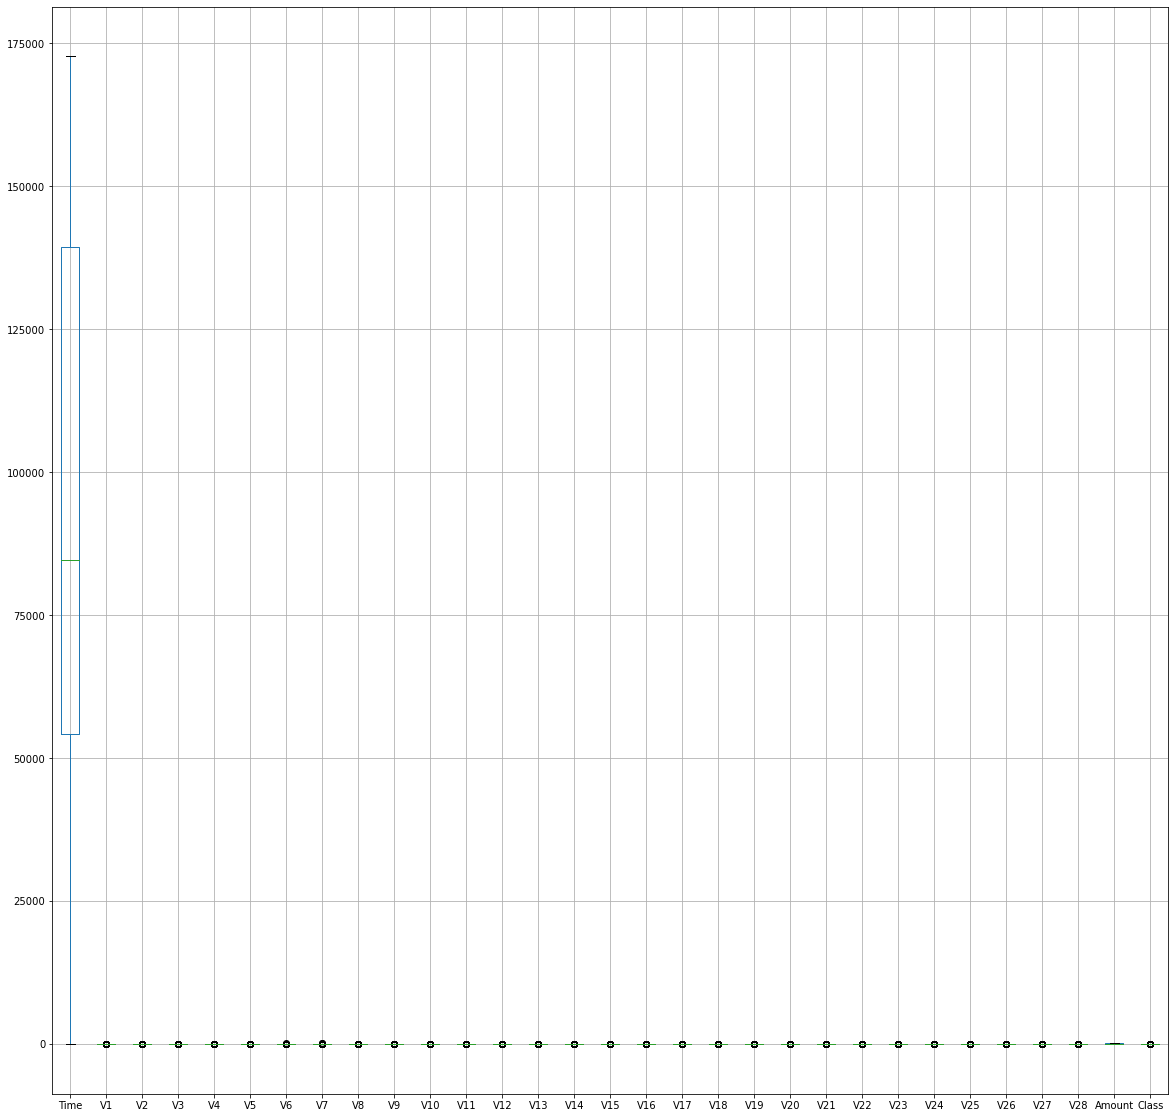

In [127]:
df.boxplot(figsize=(20,20))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount'>

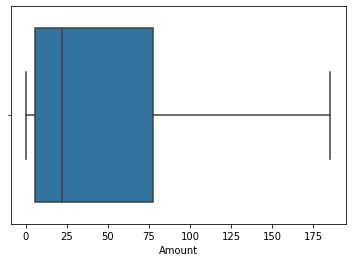

In [128]:
sns.boxplot(df['Amount']) # No  outliers after treatment

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

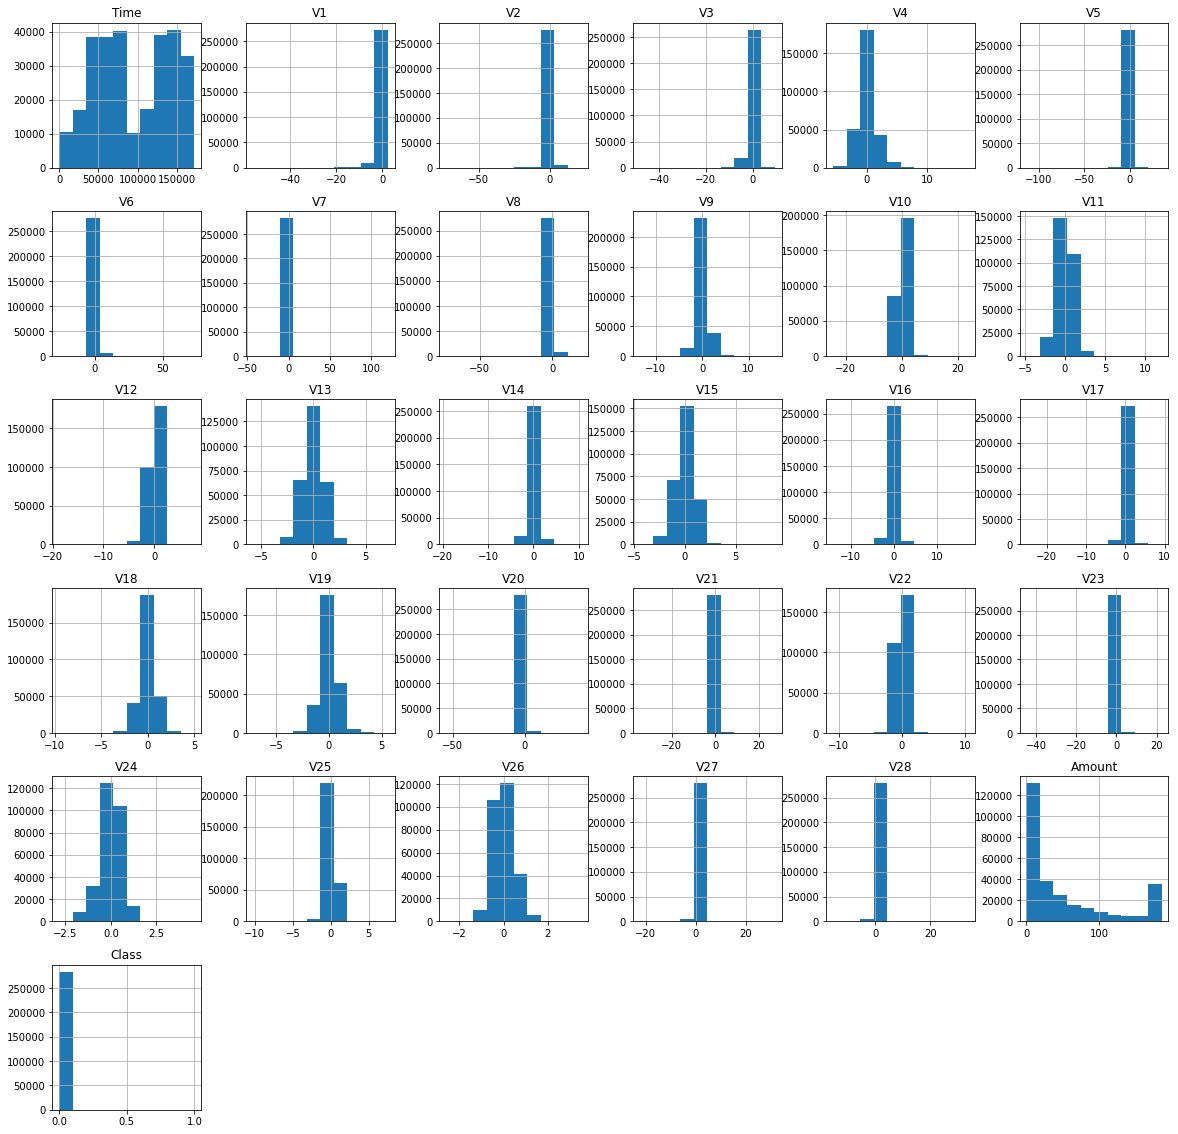

In [129]:
df.hist(figsize=(20,20)) # Frequency of histogram

#### Bivariate Analysis

<AxesSubplot:>

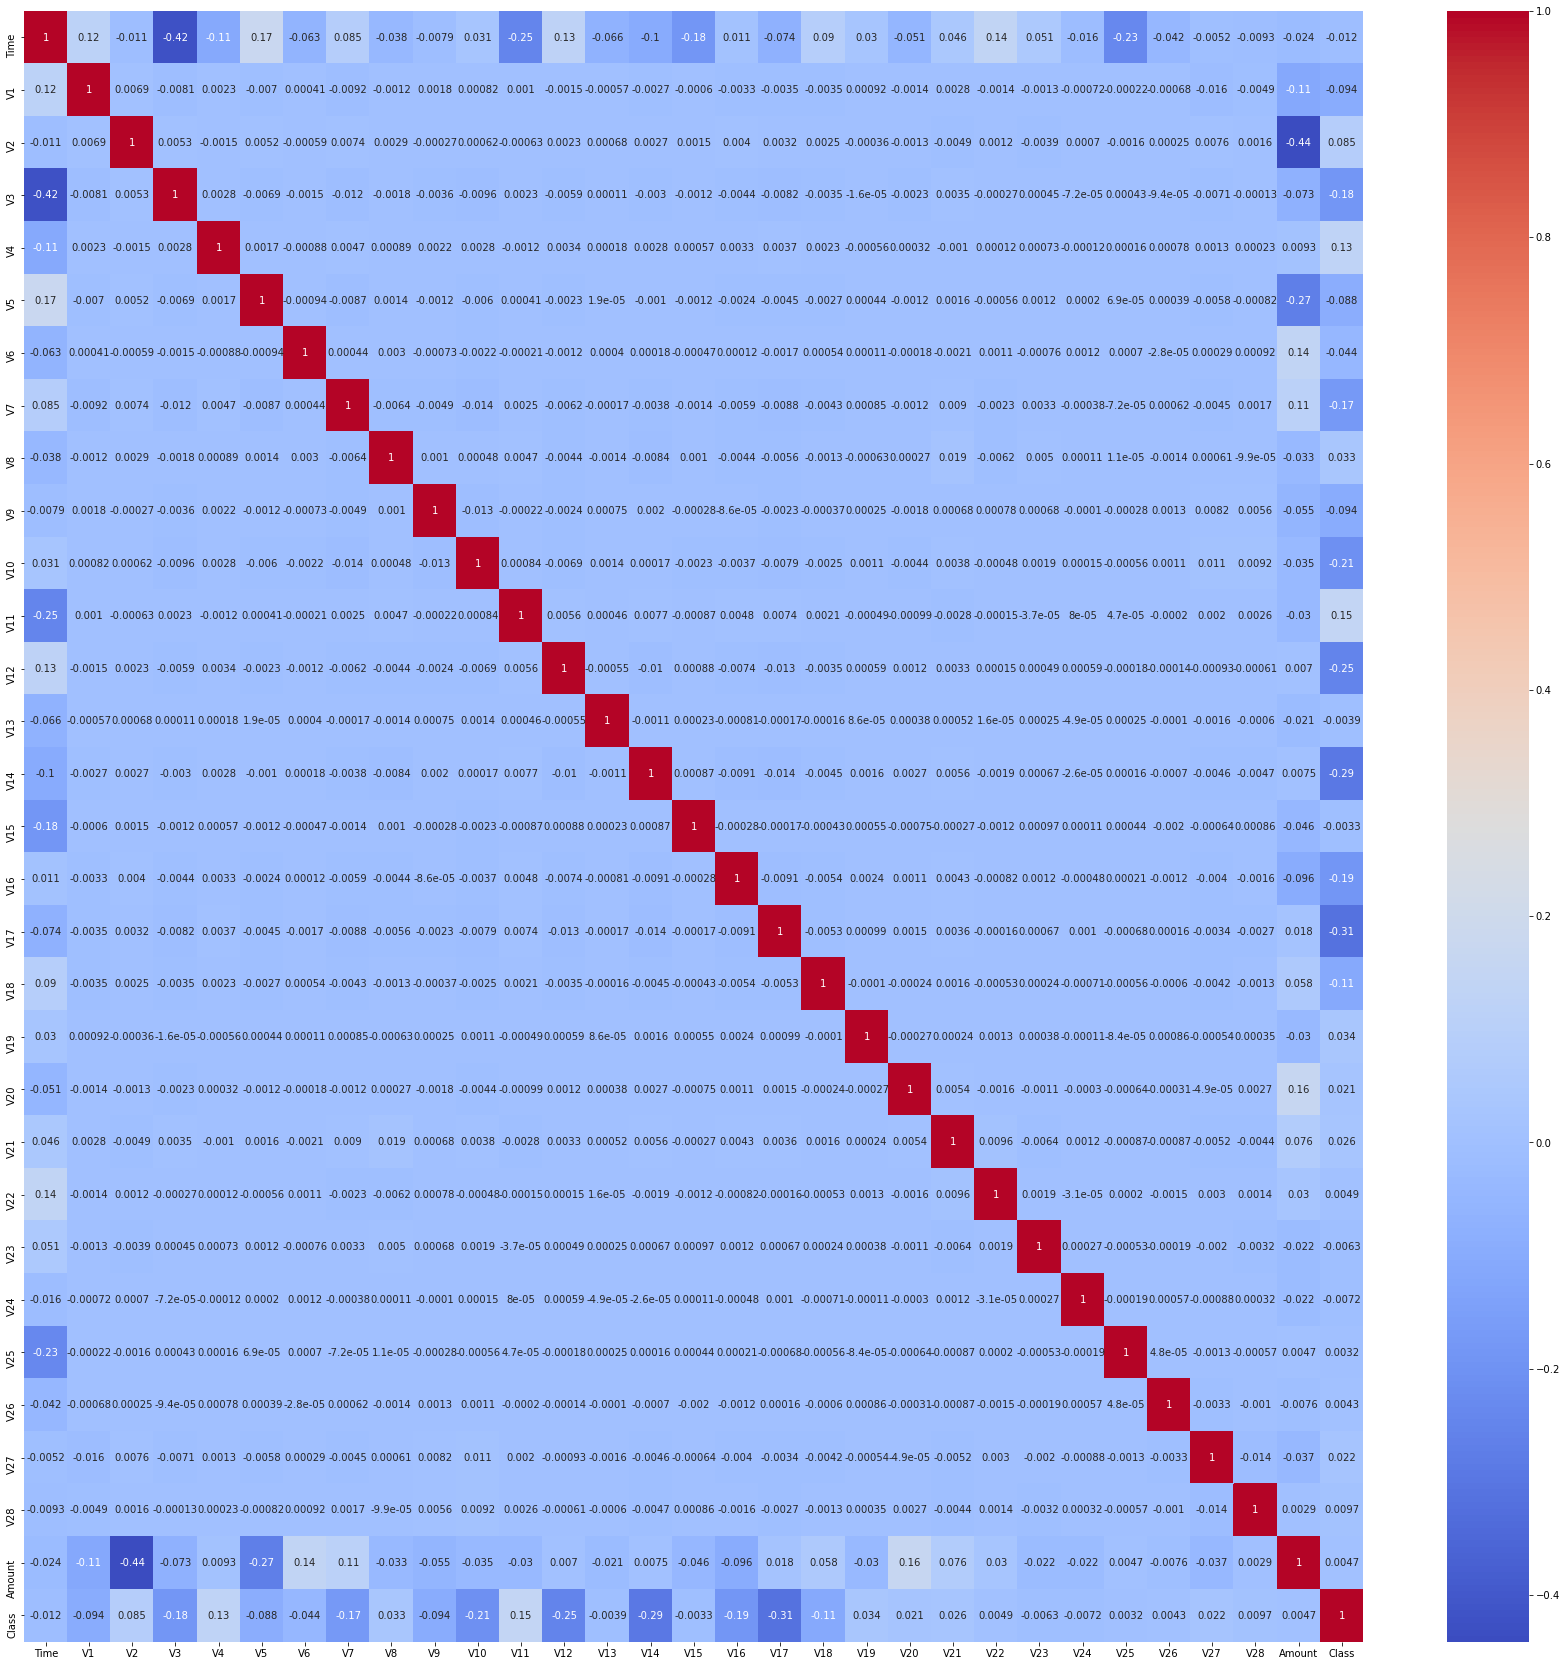

In [130]:
# Correlation Matrix
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [131]:
df.corr()[['Class']].sort_values(by='Class')[:-1]

,Class
V17,-0.313498
V14,-0.293375
V12,-0.250711
V10,-0.206971
V16,-0.187186
V3,-0.182322
V7,-0.172347
V18,-0.105340
V1,-0.094486
V9,-0.094021


## Preparing the data for machine learning model creation and creating models

In [141]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [142]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [143]:
from sklearn.preprocessing import StandardScaler

In [145]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [146]:
X_train.shape

(198608, 29)

In [147]:
Y_train.shape

(198608,)

In [148]:
X_test.shape

(85118, 29)

In [149]:
Y_test.shape

(85118,)

In [150]:
X_train=X_train.apply(zscore)
X_test=X_test.apply(zscore)
Y_train=Y_train.apply(zscore)
Y_test=Y_test.apply(zscore)

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

#### Logistic Regression

In [151]:
lr=LogisticRegression()
model=lr.fit(X_train,Y_train)
predict_test=model.predict(X_test)
predict_train=model.predict(X_train)

In [152]:
from sklearn.metrics import *

In [153]:
print('Accuracy score on train data is ',accuracy_score(Y_train,predict_train)*100,'%')#Accuracy on train data
print('Accuracy scoreon test data is ',accuracy_score(Y_test,predict_test)*100,'%')#Accuracy on test data

Accuracy score on train data is  99.91943929751066 %
Accuracy scoreon test data is  99.92715994266781 %


Text(33.0, 0.5, 'Predicted')

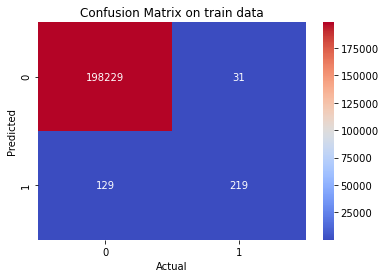

In [154]:
sns.heatmap(confusion_matrix(Y_train,predict_train),annot=True,fmt='g',cmap='coolwarm')
plt.title('Confusion Matrix on train data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(33.0, 0.5, 'Predicted')

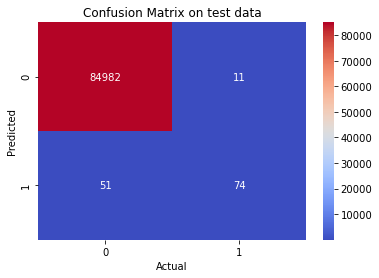

In [155]:
sns.heatmap(confusion_matrix(Y_test,predict_test),annot=True,fmt='g',cmap='coolwarm')
plt.title('Confusion Matrix on test data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [156]:
print(classification_report(Y_train,predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198260
           1       0.88      0.63      0.73       348

    accuracy                           1.00    198608
   macro avg       0.94      0.81      0.87    198608
weighted avg       1.00      1.00      1.00    198608



In [157]:
print(classification_report(Y_test,predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84993
           1       0.87      0.59      0.70       125

    accuracy                           1.00     85118
   macro avg       0.93      0.80      0.85     85118
weighted avg       1.00      1.00      1.00     85118



#### Decision Tree Classifier

In [158]:
dtree=DecisionTreeClassifier(max_depth=6)
model1=dtree.fit(X_train,Y_train)
predict1_train=model1.predict(X_train)
predict1_test=model1.predict(X_test)

In [159]:
print('Accuracy score on train data is ',accuracy_score(Y_train,predict1_train)*100,'%')#Accuracy on train data
print('Accuracy score on test data is ',accuracy_score(Y_test,predict1_test)*100,'%')#Accuracy on test data

Accuracy score on train data is  99.96676871022315 %
Accuracy score on test data is  99.93655865974294 %


Text(33.0, 0.5, 'Predicted')

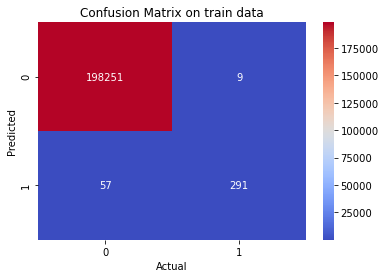

In [160]:
sns.heatmap(confusion_matrix(Y_train,predict1_train),annot=True,fmt='g',cmap='coolwarm')
plt.title('Confusion Matrix on train data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(33.0, 0.5, 'Predicted')

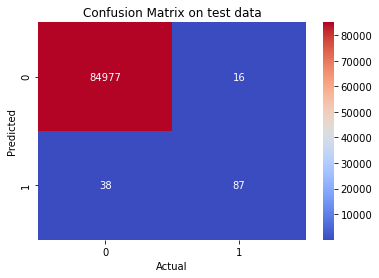

In [161]:
sns.heatmap(confusion_matrix(Y_test,predict1_test),annot=True,fmt='g',cmap='coolwarm')
plt.title('Confusion Matrix on test data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [162]:
print(classification_report(Y_train,predict1_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198260
           1       0.97      0.84      0.90       348

    accuracy                           1.00    198608
   macro avg       0.98      0.92      0.95    198608
weighted avg       1.00      1.00      1.00    198608



In [163]:
print(classification_report(Y_test,predict1_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84993
           1       0.84      0.70      0.76       125

    accuracy                           1.00     85118
   macro avg       0.92      0.85      0.88     85118
weighted avg       1.00      1.00      1.00     85118



#### XGBoost

In [164]:
xgb=XGBClassifier()
model2=xgb.fit(X_train,Y_train)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:40:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [165]:
predict2_train=model2.predict(X_train)
predict2_test=model2.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [166]:
print('Accuracy score on train data is ',accuracy_score(Y_train,predict2_train)*100,'%')#Accuracy on train data
print('Accuracy score on test data is ',accuracy_score(Y_test,predict2_test)*100,'%')#Accuracy on test data

Accuracy score on train data is  100.0 %
Accuracy score on test data is  99.95418125425878 %


Text(33.0, 0.5, 'Predicted')

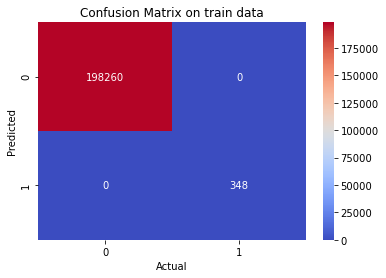

In [167]:
sns.heatmap(confusion_matrix(Y_train,predict2_train),annot=True,fmt='g',cmap='coolwarm')
plt.title('Confusion Matrix on train data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(33.0, 0.5, 'Predicted')

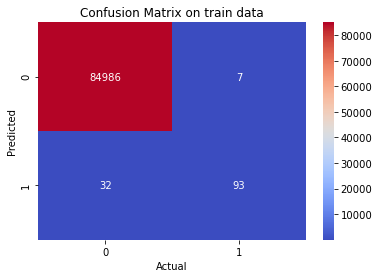

In [168]:
sns.heatmap(confusion_matrix(Y_test,predict2_test),annot=True,fmt='g',cmap='coolwarm')
plt.title('Confusion Matrix on train data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [169]:
print(classification_report(Y_train,predict2_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198260
           1       1.00      1.00      1.00       348

    accuracy                           1.00    198608
   macro avg       1.00      1.00      1.00    198608
weighted avg       1.00      1.00      1.00    198608



In [170]:
print(classification_report(Y_test,predict2_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84993
           1       0.93      0.74      0.83       125

    accuracy                           1.00     85118
   macro avg       0.96      0.87      0.91     85118
weighted avg       1.00      1.00      1.00     85118

